# CONAN in 5 minutes

In [1]:
from glob import glob
from os.path import basename

import numpy as np
import CONAN3
import matplotlib.pyplot as plt

 2 ways to use CONAN:
   - interactive setup in python environment
   - load setup from config file 

## Load from config file

In [4]:
#WASP-127
lc_data,rv_data,mcmc= CONAN3.load_configfile("my_input_config.dat",verbose=False)
lc_data

Object containing 2 lightcurves
Files:['lc6bjd.dat', 'lc8det.dat']
Filepath: data/

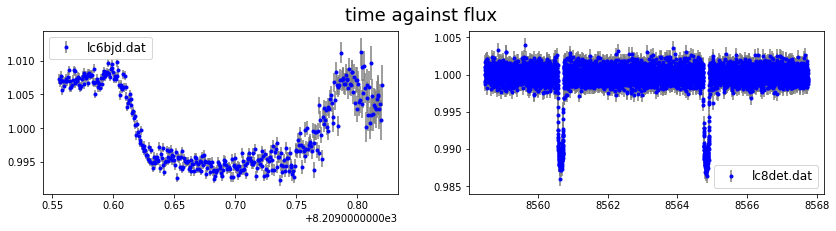

In [5]:
lc_data.plot((0,1,2))

In [6]:
rv_data.print()

# ------------------------------------------------------------
# Input RV curves, baseline function, gamma  
name            time  bis  fwhm  contrast  sinPs  gamma_kms  stepsize  prior  value  sig_lo  sig_hi
rv1.dat            0    0     0         0      0    -9.2350    0.0100  y      -9.2350  0.0100  0.0100
rv2.dat            0    0     0         0      0    -9.2050    0.0100  y      -9.2050  0.0100  0.0100


In [7]:
# mcmc = CONAN3.mcmc_setup(n_chains=64,n_burn=1000,n_cpus=6)
mcmc.print()

#=========== MCMC setup ==============================================================================
Total_no_steps           64000 
Number_chains            64 
Number_of_processes      6 
Burnin_length            1000 
Walk_(snooker/demc/mrw)  None 
GR_test_(y/n)            y 
Make_plots_(y/n)         n 
leastsq_(y/n)            y 
Savefile                 output_ex1.npy 
Savemodel                n 
Adapt_base_stepsize      y 
Remove_param_for_CNM     n 
leastsq_for_basepar      n 
lssq_use_Lev-Marq        n 
apply_CFs                y 
apply_jitter             n


### limb darkening

priors for the quadratic limb darkening coefficients can be obtained automatically using [LDTk](https://github.com/hpparvi/ldtk) by specifying the stellar parameters and filters. Filter profiles are obtained from the [SVO filter profile service](http://svo2.cab.inta-csic.es/theory/fps/) for different instruments. One only needs specify the name for the instrument as obtained from the service e.g.`'Kepler/Kepler.K'` for Kepler and `Geneva/Geneva.B1` for Geneva B1.

some filter shortcut names have been created in CONAN which can be seen using `lc_data._filter_shortcuts`


In [8]:
lc_data._filter_shortcuts

{'kepler': 'Kepler/Kepler.k',
 'tess': 'TESS/TESS.Red',
 'cheops': 'CHEOPS/CHEOPS.band',
 'wfc3_g141': 'HST/WFC3_IR.G141',
 'wfc3_g102': 'HST/WFC3_IR.G102',
 'sp36': 'Spitzer/IRAC.I1',
 'sp45': 'Spitzer/IRAC.I2',
 'ug': 'Geneva/Geneva.U',
 'b1': 'Geneva/Geneva.B1',
 'b2': 'Geneva/Geneva.B2',
 'bg': 'Geneva/Geneva.B',
 'gg': 'Geneva/Geneva.G',
 'v1': 'Geneva/Geneva.V2',
 'vg': 'Geneva/Geneva.V',
 'sdss_g': 'SLOAN/SDSS.g',
 'sdss_r': 'SLOAN/SDSS.r',
 'sdss_i': 'SLOAN/SDSS.i',
 'sdss_z': 'SLOAN/SDSS.z'}

In [9]:
#order of the filters in CONAN. assign lD filter names based on this order
lc_data._filters

['G', 'T']

In [16]:
#uncertainties from ldtk are underestimated, so an uncertainty multiplier (unc_mult) can be used to inflate them.
u1, u2 = lc_data.get_LDs(Teff=(5620,85), logg=(4.18,0.01), Z=(-0.18,0.06),
                         filter_names=["GG","tess"], unc_mult=20,
                         use_result=True)

GG        (G): u1=(0.5509, 0.0178), u2=(0.1332, 0.046)
tess      (T): u1=(0.4138, 0.0153), u2=(0.1325, 0.0409)

Setting-up limb-darkening priors from LDTk result
#=========== Limb darkending setup ===================================================================
filters priors	c_1  step1  sig_lo1  sig_hi1  lo_lim1 hi_lim1	c_2  step2 sig_lo2 sig_hi2  lo_lim2 hi_lim2
G       y     	0.551 0.002  0.0178  0.0178   0.0000  2.0000	0.133 0.005  0.0460  0.0460  -1.0000  1.0000
T       y     	0.414 0.002  0.0153  0.0153   0.0000  2.0000	0.133 0.004  0.0409  0.0409  -1.0000  1.0000


The returned u1 and u2 are only the coefficient values that can be used to fix the ldcs if desired.

In [21]:
u1,u2

([0.5509, 0.4138], [0.1332, 0.1325])

In [22]:
lc_data.limb_darkening(c1=u1, c2=u2)

#=========== Limb darkending setup ===================================================================
filters priors	c_1  step1  sig_lo1  sig_hi1  lo_lim1 hi_lim1	c_2  step2 sig_lo2 sig_hi2  lo_lim2 hi_lim2
G       n     	0.551 0.000  0.0000  0.0000   0.0000  0.0000	0.133 0.000  0.0000  0.0000   0.0000  0.0000
T       n     	0.414 0.000  0.0000  0.0000   0.0000  0.0000	0.133 0.000  0.0000  0.0000   0.0000  0.0000


### add depth variation

In [23]:
lc_data.transit_depth_variation(ddFs="y", transit_depth_per_group=(0.1,0.0001))

#=========== ddF setup ============================================================================== 
Fit_ddFs  step	 low_lim   up_lim   prior   sig_lo   sig_hi   div_white
y         0.001	 -1.0000   1.0000   n       0.00000   0.00000   n  
group_ID   RpRs_0   err		dwfile
     1	   0.1000   1.00e-04   dw_001.dat
     2	   0.1000   1.00e-04   dw_002.dat


In [24]:
lc_data.print()

#--------------------------------------------- 
# Input lightcurves filters baseline function-------------- 
name           	fil	 lamda	 time	 roll	 x	 y	 conta	 sky	 sin	 group	 id	 GP
lc6bjd.dat     	G  	600.0	    0	   0	 0	 0	     2	   2	   0	     0	  1	 ce
lc8det.dat     	T  	800.0	    0	   0	 0	 0	     0	   0	   0	     0	  2	 n 
# -------- photometry GP input properties: komplex kernel -> several lines -------------- 
name          para  kernel WN scale   s_step s_pri s_pri_wid s_up  s_lo  metric  m_step m_pri  m_pri_wid m_up m_lo
lc6bjd.dat    time  mat32  y  8.0e-04 0.1000   0.0  0.00e+00  0.0 -20.0 1.2e-02 0.1000  0.00  0.00e+00  0.0 -12.0
#=========== jump parameters (Jump0value step lower_limit upper_limit priors) ====================== 
name        	fit	start_val	stepsize	low_lim	up_lim	prior	value	sig_lo	sig_hi
RpRs        	n  	 0.10500	0.0000000	0.00	1.00	n	0.10500	0.0e+00	0.0e+00 
Impact_para 	y  	 0.40000	0.0100000	0.00	1.50	p	0.40000	1.0e-01	1.0e-01 
Duration    	y  	 0

In [25]:
rv_data=None

In [14]:
result = CONAN3.fit_data(lc_data,rv_data,mcmc,skip_initial_state_check=True);

CONAN3 launched!!!

Setting up photometry arrays ...
Setting up photometry GPs ...
Setting up RV arrays ...

Plotting initial guess
---------------------------

Lightcurve number: 0
Using Celerite GP
GP values used: [-7.         -7.13089883 -4.42284863]
Writing init with gp to file: lc6bjd_out_full.dat

Lightcurve number: 1
Writing init without gp to file: lc8det_out_full.dat

Running MCMC
No of dimensions:  14
No of chains:  64
fitting parameters:  ['T_0' 'b' 'dur_[d]' 'R_dRpRs' 'T_dRpRs' 'lc6bjd.dat_A0' 'lc6bjd.dat_D1'
 'lc6bjd.dat_D2' 'lc6bjd.dat_E1' 'lc6bjd.dat_E2' 'lc8det.dat_A0'
 'CEphotWN_lc1' 'CEphotscale_lc1dim0' 'CEphotmetric_lc1dim0']

Running first burn-in...


100%|████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.21it/s]


Running second burn-in...


100%|████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.87it/s]


burn-in chain written to disk.
Running production...


100%|████████████████████████████████████████████████████████████████| 1000/1000 [01:50<00:00,  9.07it/s]


Mean acceptance fraction: 0.296
Production chain written to disk as `chains_dict.pkl`. Run `result=CONAN3.load_result()` to load it.
Plotting output figures

Lightcurve number: 0
Using Celerite GP
GP values used: [-7.42863909 -7.5598955  -4.28247783]
Writing init with gp to file: lc6bjd_out_full.dat

Lightcurve number: 1
Writing init without gp to file: lc8det_out_full.dat

Lightcurve number: 0
Using Celerite GP
GP values used: [-7.39680772 -7.69587726 -4.58213485]
Writing init with gp to file: lc6bjd_out_full.dat

Lightcurve number: 1
Writing init without gp to file: lc8det_out_full.dat


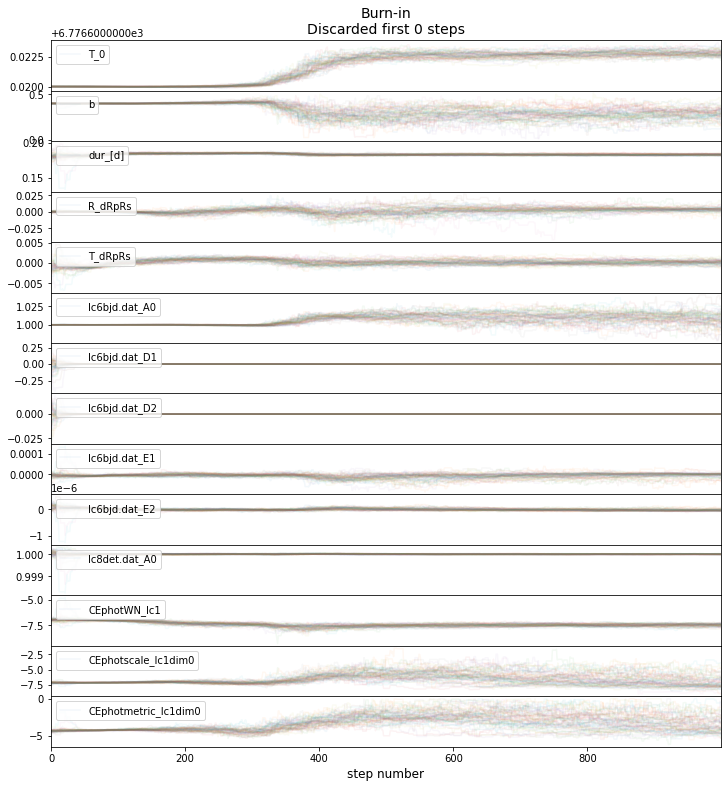

In [15]:
result.plot_burnin_chains();

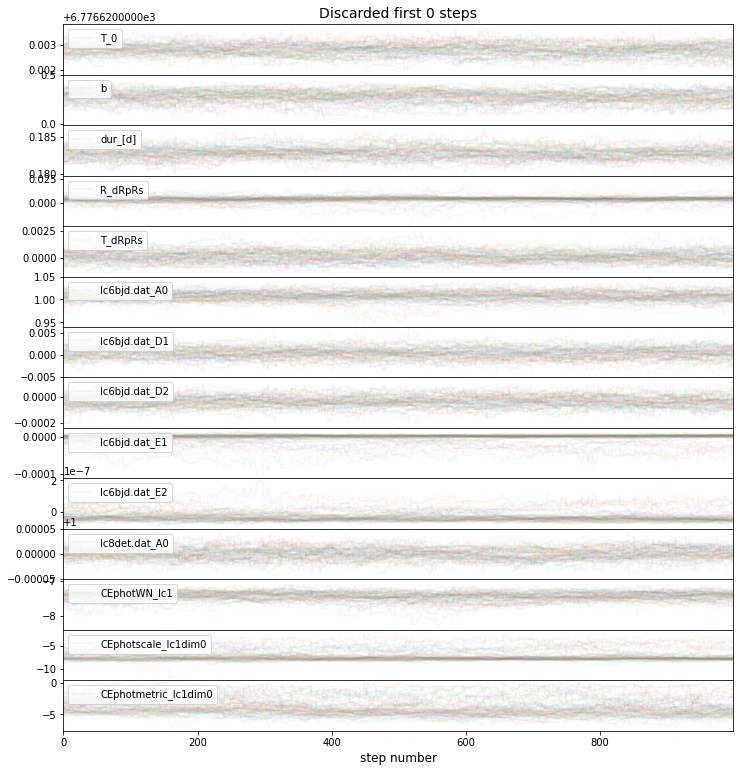

In [17]:
result.plot_chains();

### Load result array

In [18]:
res_array = CONAN3.load_result_array()

Output files loaded are: ['lc8det_out_full.dat', 'lc6bjd_out_full.dat'] 


In [19]:
df = res_array['lc6bjd_out_full.dat']
df.keys()

Index(['time', 'flux', 'error', 'full_mod', 'gp*base', 'transit', 'det_flux'], dtype='object')

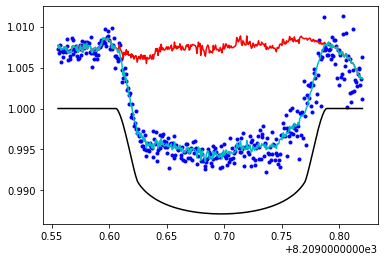

In [20]:
plt.plot(df["time"], df["flux"],"b.")
plt.plot(df["time"], df["gp*base"],"r")
plt.plot(df["time"], df["transit"],"k")
plt.plot(df["time"], df["full_mod"],"c")